In [2]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
import classD_1dMFGTN  # make sure this points to the lowercase file
import time 
importlib.reload(classD_1dMFGTN)
import scipy
from classD_1dMFGTN import classD_1d_MFGTN
from pfapack import pfaffian as pf


In [4]:
# 1) Initialize
N = 32
nshell = 1
mu_1 = 1
t_1 = 1 #sgn(mu-^2-4t^2)

def ee_deg(G, N_A=None, tol=1e-8):
    if N_A is None:
        N_A = G.shape[0] // 2
    eigs = np.linalg.eigvalsh(1j * G[:2*N_A, :2*N_A])
    zero_modes = np.sum(np.abs(eigs) < tol) // 2
    return eigs, zero_modes

model = classD_1d_MFGTN(N=N, DW=False, nshell=nshell, mu_1=mu_1, t_1=t_1)
G_exact = model.kitaev_GS_covariance(N=N, DW=False, PBCs=True)

eigs_exact, zero_modes_exact = ee_deg(model.basis_sep_to_interleaved(G_exact), N_A=N//2)
print("Exact zero modes (EE):", zero_modes_exact)
print("Exact eigs (EE):", eigs_exact)

start = time.time()
# 2) Run a single-sample adaptive circuit with postselection
result = model.run_adaptive_circuit(
    cycles=20,
    G_history=True,
    progress=True,
    postselect=False,
    samples=1,
    parallelize_samples=False,
    store="top",
    init_mode="random_pure",
    save=False,
    sigma=0.8,
)
print("Adaptive circuit time:", time.time() - start)
G_hist = result["G_hist"][0]   # shape (T, 2N, 2N)
G_dyn = G_hist[-1]

eigs_dyne, zero_modes_dyn = ee_deg(model.basis_sep_to_interleaved(G_dyn), N_A=N//2)
print("Dyn zero modes (EE):", zero_modes_dyn)
print("Dyn eigs (EE):", eigs_dyne)


------------------------- classD_1d_MFGTN Initialized -------------------------
Exact zero modes (EE): 1
Exact eigs (EE): [-1.00000000e+00 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00
 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00
 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00 -9.99999791e-01
 -9.99999791e-01 -9.99354195e-01 -9.99354195e-01 -5.86802532e-16
  5.18253578e-16  9.99354195e-01  9.99354195e-01  9.99999791e-01
  9.99999791e-01  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00]


Running adaptive circuit (sites)::   0%|          | 0/640 [00:00<?, ?site/s]

Total elapsed: 120.86 s
Adaptive circuit time: 120.86707615852356
Dyn zero modes (EE): 0
Dyn eigs (EE): [-1.00000000e+00 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00
 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00
 -1.00000000e+00 -9.99999999e-01 -9.99999917e-01 -9.99835967e-01
 -9.99754571e-01 -9.91476802e-01 -9.84041089e-01 -4.02589218e-04
  4.02589218e-04  9.84041089e-01  9.91476802e-01  9.99754571e-01
  9.99835967e-01  9.99999917e-01  9.99999999e-01  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00]


In [8]:
# 1) Initialize
N = 16
nshell = 1
mu_1 = 1
t_1 = 1 #sgn(mu-^2-4t^2)

def ee_deg(G, N_A=None, tol=1e-8):
    if N_A is None:
        N_A = G.shape[0] // 2
    eigs = np.linalg.eigvalsh(1j * G[:2*N_A, :2*N_A])
    zero_modes = np.sum(np.abs(eigs) < tol) // 2
    return eigs, zero_modes

model = classD_1d_MFGTN(N=N, DW=False, nshell=nshell, mu_1=mu_1, t_1=t_1)
G_exact = model.kitaev_GS_covariance(N=N, DW=False, PBCs=True)

eigs_exact, zero_modes_exact = ee_deg(model.basis_sep_to_interleaved(G_exact), N_A=N//2)
print("Exact zero modes (EE):", zero_modes_exact)
print("Exact eigs (EE):", eigs_exact)

start = time.time()
# 2) Run a single-sample adaptive circuit with postselection
result = model.run_adaptive_circuit(
    cycles=20,
    G_history=True,
    progress=True,
    postselect=False,
    samples=1,
    parallelize_samples=False,
    store="top",
    init_mode="random_pure",
    save=False,
    sigma=0.8,
)
print("Adaptive circuit time:", time.time() - start)
G_hist = result["G_hist"][0]   # shape (T, 2N, 2N)
G_dyn = G_hist[-1]

eigs_dyne, zero_modes_dyn = ee_deg(model.basis_sep_to_interleaved(G_dyn), N_A=N//2)
print("Dyn zero modes (EE):", zero_modes_dyn)
print("Dyn eigs (EE):", eigs_dyne)


------------------------- classD_1d_MFGTN Initialized -------------------------
Exact zero modes (EE): 1
Exact eigs (EE): [-1.00000000e+00 -1.00000000e+00 -1.00000000e+00 -9.99999812e-01
 -9.99999812e-01 -9.99354946e-01 -9.99354946e-01 -1.76172323e-16
  2.63759767e-16  9.99354946e-01  9.99354946e-01  9.99999812e-01
  9.99999812e-01  1.00000000e+00  1.00000000e+00  1.00000000e+00]


Running adaptive circuit (sites)::   0%|          | 0/320 [00:00<?, ?site/s]

Total elapsed: 0.25 s
Adaptive circuit time: 0.2498323917388916
Dyn zero modes (EE): 0
Dyn eigs (EE): [-1.         -1.         -1.         -0.99999991 -0.99993104 -0.99989479
 -0.99930441 -0.00297792  0.00297792  0.99930441  0.99989479  0.99993104
  0.99999991  1.          1.          1.        ]


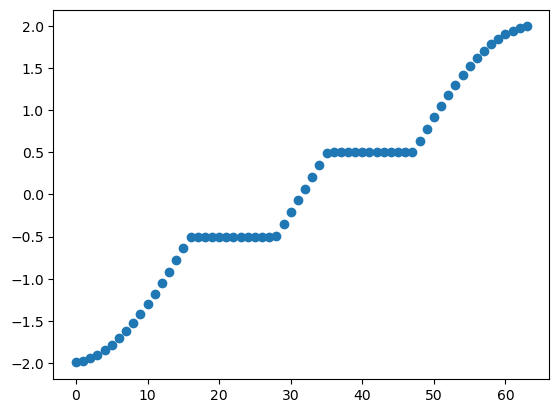

In [3]:

H = model.kitaev_majorana_hamiltonian(N=N, DW=True, PBCs=True)
eigvals = np.linalg.eigvalsh(H)
plt.plot(eigvals, "o")

Running adaptive circuit (sites)::   0%|          | 0/640 [00:00<?, ?site/s]

Total elapsed: 362.80 s
Adaptive circuit time: 362.81100583076477
(21, 64, 64)


Dynamical invariant:  -0.9999999999993907
Dynamical invariant with coherent errors (sigma=0.1):  -0.9999999999993906


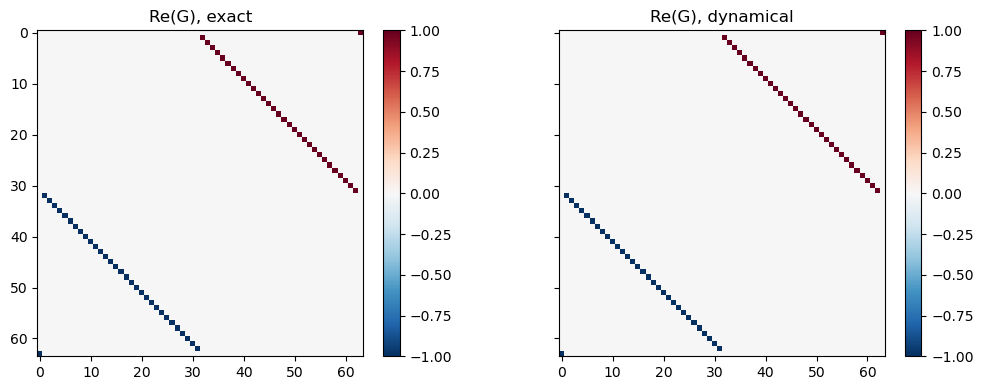

In [ ]:
# 4) Frobenius norms vs time
fro_diffs = [np.linalg.norm(G_hist[t] - G_exact, ord="fro") for t in range(T)]
fig, axs = plt.subplots(1, 2, figsize=(11, 4), sharey=True)
im = axs[0].imshow(np.real(G_exact), cmap="RdBu_r")
axs[0].set_title(rf"Re(G), exact")
fig.colorbar(im, ax=axs[0], fraction=0.046, pad=0.04)
im = axs[1].imshow(np.real(G_hist[-1]), cmap="RdBu_r")
axs[1].set_title(rf"Re(G), dynamical")
fig.colorbar(im, ax=axs[1], fraction=0.046, pad=0.04)

fig.tight_layout()
plt.show()



/tmp/ipykernel_1311735/827167913.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


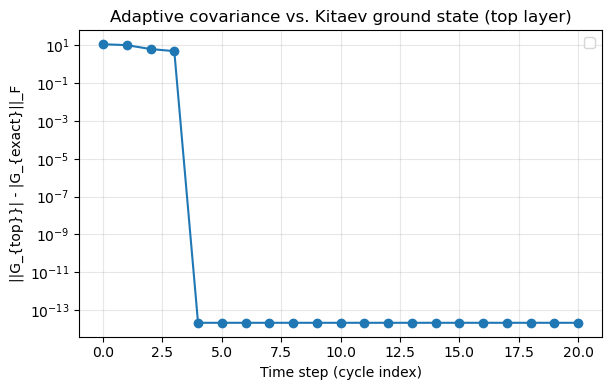

In [97]:
# 5) Plot
t = np.arange(T)
plt.figure(figsize=(6, 4))
plt.plot(t, fro_diffs, "o-")
plt.xlabel("Time step (cycle index)")
plt.ylabel(r"||G_{top}}| - |G_{exact}||_F")
plt.title("Adaptive covariance vs. Kitaev ground state (top layer)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.yscale("log")
plt.legend()
plt.show()

In [ ]:
# Z2 phase diagnostics (exact GS vs adaptive circuit)
import time
import numpy as np
from classD_1dMFGTN import classD_1d_MFGTN

# 1) Initialize
N = 32
nshell = 1
mu_1 = 1
t_1 = 1

model = classD_1d_MFGTN(N=N, DW=False, nshell=nshell, mu_1=mu_1, t_1=t_1)

# Exact GS covariance (PBC)
G_exact = model.kitaev_GS_covariance(N=N, DW=False, PBCs=True)
nu_exact = model.measure_z2_wilson_loop(G_exact)
print("Exact Z2 invariant:", nu_exact)

# 2) Run adaptive circuit
start = time.time()
result = model.run_adaptive_circuit(
    cycles=20,
    G_history=True,
    progress=True,
    postselect=False,
    samples=1,
    parallelize_samples=False,
    store="top",
    init_mode="random_pure",
    save=False,
    sigma=0.8,
)
print("Adaptive circuit time:", time.time() - start)

G_hist = result["G_hist"][0]
G_dyn = G_hist[-1]

nu_dyn = model.measure_z2_wilson_loop(G_dyn)
print("Adaptive circuit Z2 invariant:", nu_dyn)
